# COMP 562 Final Project


# Fake News Classification Using Naive Bayes Classifier

## I. Data Import & Visualization

In [1]:
# Import required libraries
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet

In [2]:
# Check working directory
os.getcwd()

'C:\\Users\\lisiy\\Documents\\COMP562-Final-Project\\src'

Read in data from CSV file and drop unnecessary column(s). Then, check for NAN values and whether the dataset is balanced.

In [3]:
# Read in data frame
df = pd.read_csv('../data/fake_or_real_news.csv')
# We don't need the first column(number), so we keep the other columns
df = df[['title', 'text', 'label']]
# View the first few rows of data
df.head()

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
# Check dimensions of dataset
df.shape

(6335, 3)

In [5]:
# Check if there are NAN values in the dataset
df.isnull().values.any()

False

([<matplotlib.patches.Wedge at 0x29602b9a190>,
 [Text(-0.0019265736658114806, 1.1099983280680699, 'REAL'),
  Text(0.001926573665811098, -1.1099983280680699, 'FAKE')],
 [Text(-0.0010587476902207235, 0.6099990811905608, '50.06%'),
  Text(0.0010587476902205132, -0.6099990811905608, '49.94%')])

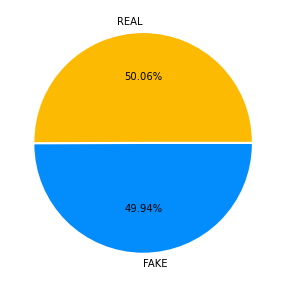

In [6]:
# There is no NAN in out dataset, we go ahead and check if the dataset is balanced
plt.figure(figsize=(5, 5))
colors = ['#FCBA03', '#038CFC']
# Plot a pie chart to clearly view the ratio between REAL and FAKE labels
plt.pie(df['label'].value_counts(), labels=['REAL', 'FAKE'], autopct='%.2f%%', explode=[0.01,0.01], colors=colors)

It is reasonable to conclude that the dataset is balanced based on the pie chart

## II. Data Processing

To better train our model, we need to process our data. Since our data source is text, it main contain punctuations and other special characters that main increase the difficulty for our model training, so we need to cope with that. Also, we need to lemmatize our text to transform words into their base forms(i.e. dogs -> dog; sleeping ->sleep) before moving on to model training

In [10]:
def data_cleaning(text):
    # Convert text to lower case
    text = text.lower()
    # Remove numbers, special characters, and punctuation from the text
    text = re.sub('[^a-zA-Z]', ' ', text)
    lemmatizer = WordNetLemmatizer()
    # Split text into tokens
    token = nltk.word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    lemmatized = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in token if word not in stop_words]
    cleaned_text = ' '.join(lemmatized)
    return cleaned_text

# Noticing that simply lemmatizing with WordNet doesn't do a good job on verbs, the helper function below helps
# get the tag of a single word recognized by WordNet, which can be fed to the lemmatizer to generate more accurate
# lemmatization
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)
    
print(data_cleaning('flying', get_wordnet_pos('flying')))

KeyboardInterrupt: 